# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** Rika Rostika Afipah
- **Email:** rikarapipah@gmail.com
- **ID Dicoding:** Rikaraae

## Import Semua Packages/Library yang Digunakan

In [3]:
# Install
!pip install gdown tensorflowjs

# Import libraries
import os
import zipfile
import gdown
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


## Data Preparation

### Data Loading

In [4]:
# Download dataset dari Google Drive
url = 'https://drive.google.com/uc?id=1l1MnLz-j7crCQQhCvJLb9ma4I9ti_LgE'
output = 'hewan_dataset.zip'
gdown.download(url, output, quiet=False)

# Eksrak dataset
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('dataset_hewan')

# Cek
os.listdir('dataset_hewan')


Downloading...
From (original): https://drive.google.com/uc?id=1l1MnLz-j7crCQQhCvJLb9ma4I9ti_LgE
From (redirected): https://drive.google.com/uc?id=1l1MnLz-j7crCQQhCvJLb9ma4I9ti_LgE&confirm=t&uuid=f13e7362-f081-48c5-8e16-edcf3ab09e96
To: /content/hewan_dataset.zip
100%|██████████| 6.95G/6.95G [01:36<00:00, 72.2MB/s]


['dog', 'wild', 'cat']

### Data Preprocessing

#### Split Dataset

In [5]:
# Install split-folders
!pip install split-folders

import splitfolders

# Split dataset into train (70%), val (15%), test (15%)
splitfolders.ratio("dataset_hewan", output="data_split", seed=42, ratio=(0.7, 0.15, 0.15), move=True)

Copying files: 15803 files [00:00, 18402.07 files/s]


## Modelling

In [6]:
train_dir = 'data_split/train'
val_dir = 'data_split/val'
test_dir = 'data_split/test'

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_data = val_datagen.flow_from_directory(val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')


Found 11061 images belonging to 3 classes.
Found 2369 images belonging to 3 classes.
Found 2373 images belonging to 3 classes.


## Evaluasi dan Visualisasi

In [7]:
# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,739 (40.58 MB)

 Trainable params: 10,636,739 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_accuracy')
]
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=callbacks
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6612 - loss: 0.8679

346/346 ━━━━━━━━━━━━━━━━━━━━ 568s 2s/step - accuracy: 0.6616 - loss: 0.8670 - val_accuracy: 0.9105 - val_loss: 0.2526
Epoch 2/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 646s 2s/step - accuracy: 0.9160 - loss: 0.2279 - val_accuracy: 0.9076 - val_loss: 0.2428
Epoch 3/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9470 - loss: 0.1496

346/346 ━━━━━━━━━━━━━━━━━━━━ 549s 2s/step - accuracy: 0.9470 - loss: 0.1496 - val_accuracy: 0.9481 - val_loss: 0.1546
Epoch 4/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 552s 2s/step - accuracy: 0.9717 - loss: 0.0812 - val_accuracy: 0.9481 - val_loss: 0.1532
Epoch 5/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9788 - loss: 0.0649

346/346 ━━━━━━━━━━━━━━━━━━━━ 563s 2s/step - accuracy: 0.9788 - loss: 0.0649 - val_accuracy: 0.9569 - val_loss: 0.1533
Epoch 6/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 537s 2s/step - accuracy: 0.9855 - loss: 0.0398 - val_accuracy: 0.9439 - val_loss: 0.1952
Epoch 7/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 536s 2s/step - accuracy: 0.9875 - loss: 0.0361 - val_accuracy: 0.9553 - val_loss: 0.1770


In [9]:
# Evaluasi model
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy*100:.2f}%")


75/75 ━━━━━━━━━━━━━━━━━━━━ 61s 809ms/step - accuracy: 0.9554 - loss: 0.1351
Test Accuracy: 94.99%


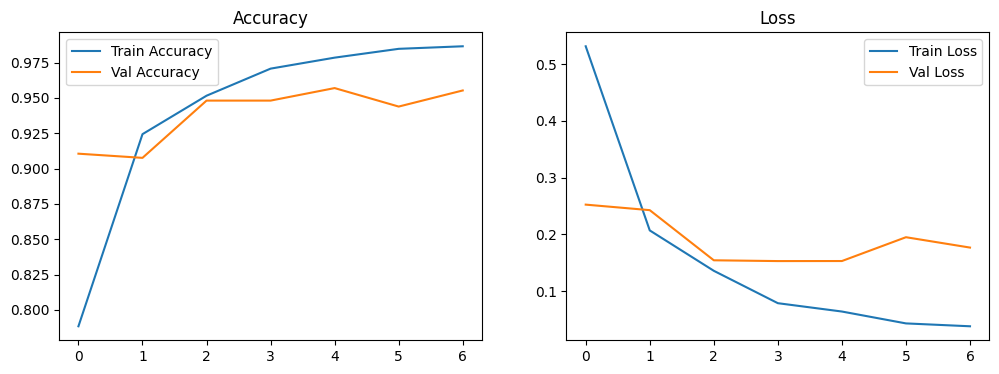

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

## Konversi Model

In [11]:
# Simpan model ke format native Keras
model.save("model_akhir.keras")


In [12]:
# Simpan ke SavedModel
model.export("saved_model")


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  138187351006992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138187351008144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138187351010448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138187351007760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138187351009872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138187351012176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138187351011984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138187351012752: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [13]:
# Instal TensorFlow.js converter (hanya perlu sekali)
!pip install tensorflowjs

# Konversi model SavedModel ke TFJS
!tensorflowjs_converter --input_format=tf_saved_model saved_model tfjs_model

2025-05-04 17:51:43.337317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746381103.954175   24465 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746381104.176973   24465 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-05-04 17:52:03.650011: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
I0000 00:00:1746381124.112974   24465 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
I0000 00:00

In [15]:
# Konversi model ke TF-Lite dari folder SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
tflite_model = converter.convert()

# Simpan ke file .tflite
with open("model.tflite", "wb") as f:
    f.write(tflite_model)


In [16]:
# Zip SavedModel
!zip -r saved_model.zip saved_model

# Zip TFJS model
!zip -r tfjs_model.zip tfjs_model

  adding: saved_model/ (stored 0%)
  adding: saved_model/variables/ (stored 0%)
  adding: saved_model/variables/variables.index (deflated 60%)
  adding: saved_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: saved_model/saved_model.pb (deflated 84%)
  adding: saved_model/assets/ (stored 0%)
  adding: saved_model/fingerprint.pb (stored 0%)
  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard8of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard9of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard10of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard4of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard7of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard2of11.bin (deflated 7%)
  adding: tfjs_model/model.json (deflated 86%)
  adding: tfjs_model/group1-shard1of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard5of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard11of11.bin (deflated 7%)
  adding: tfjs_model/group1-shard3of11.bin

## Inference (Optional)

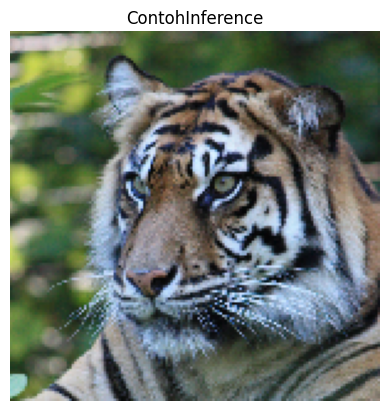

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Predicted class: wild


In [17]:
sample_batch, label_batch = next(val_data)
img = sample_batch[0]

plt.imshow(img)
plt.axis('off')
plt.title("ContohInference")
plt.show()

pred = model.predict(np.expand_dims(img, axis=0))
predicted_class = np.argmax(pred[0])
class_names = list(train_data.class_indices.keys())
print(f"Predicted class: {class_names[predicted_class]}")
